Imports

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, BatchNormalization, LeakyReLU, Reshape, Conv2DTranspose, Conv2D, BatchNormalization, Dropout, Flatten
from tensorflow.keras.models import Sequential

import matplotlib.pyplot as plt
import numpy as np


Setup Data

In [2]:
source_dir = './data/smd'

setting up the generator

In [3]:
def make_generator_model(input_dim):
    model = Sequential()
    model.add(Dense(7*7*256, use_bias=False, input_dim=100))
    model.add(BatchNormalization())
    model.add(LeakyReLU())

    model.add(Reshape((7, 7, 256)))

    model.add(Conv2DTranspose(128, (5,5), strides=(1,1), padding='same', use_bias=False))
    model.add(BatchNormalization())
    model.add(LeakyReLU())

    model.add(Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    model.add(BatchNormalization())
    model.add(LeakyReLU())

    model.add(Conv2DTranspose(3, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))

    return model

In [4]:
latent_dim = 100
batch_size = 15

In [5]:
generator = make_generator_model(latent_dim)

In [6]:
generator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12544)             1254400   
_________________________________________________________________
batch_normalization (BatchNo (None, 12544)             50176     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 12544)             0         
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 256)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 7, 7, 128)         819200    
_________________________________________________________________
batch_normalization_1 (Batch (None, 7, 7, 128)         512       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 7, 7, 128)         0

In [7]:
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, batch_size):
	x_input = np.random.randn(latent_dim * batch_size)
	# reshape into a batch of inputs for the network
	x_input = x_input.reshape(batch_size, latent_dim)
	return x_input

Here an example of the output from the untrained generator

In [8]:
noise = generate_latent_points(latent_dim, batch_size)
print(noise)
generated_image = generator.predict(noise)

[[-0.70215959 -1.02586502  0.28188549 ... -1.05421019 -0.67504002
   1.46894599]
 [ 2.3233559   1.83005723  0.65536854 ...  0.48528817 -0.33276722
   1.70620082]
 [-0.77217659 -0.59110821  1.01064006 ... -0.34548187 -1.03612134
  -2.04788111]
 ...
 [-0.11901741 -0.76286033  0.7000124  ... -0.73896016 -0.36826141
  -0.71837082]
 [-0.54215185 -0.5240147   0.36858509 ... -0.30775183 -0.73255811
  -1.09682439]
 [ 0.92527192  0.2865088  -0.04502398 ... -0.21567624  0.68593413
  -0.19020476]]


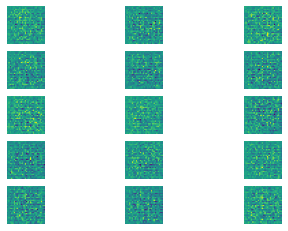

In [9]:
for i in range(batch_size):
    plt.subplot(5, 3, 1 + i)
    plt.axis('off')
    plt.imshow(generated_image[i, :, :, 0])
plt.show()

setting up the discriminator model

In [10]:
def make_discriminator_model():
    model = Sequential()
    model.add(Conv2D(64, (5,5), strides=(2,2), padding='same', input_shape=[28,28,3]))

    model.add(LeakyReLU())
    model.add(Dropout(0.3))

    model.add(Conv2D(128, (5,5), strides=(2,2), padding='same'))
    model.add(LeakyReLU())
    model.add(Dropout(0.3))

    model.add(Flatten())
    model.add(Dense(1))

    return model

In [11]:
discriminator = make_discriminator_model()
decision = discriminator(generated_image)
print(decision)

tf.Tensor(
[[-0.00407338]
 [-0.0041613 ]
 [-0.00230188]
 [-0.00038725]
 [-0.00420114]
 [-0.00078158]
 [-0.00359596]
 [-0.00086894]
 [-0.00334096]
 [ 0.00113008]
 [-0.00138658]
 [-0.00124633]
 [-0.00236101]
 [ 0.0003554 ]
 [ 0.00373134]], shape=(15, 1), dtype=float32)


In [ ]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [13]:
def discrimator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

SyntaxError: unexpected EOF while parsing (<ipython-input-13-b2b2400b9d0d>, line 2)

In [ ]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

generator_optimizer = tf.keras.optimizers.Adam(0.001)
discriminator_optimizer = tf.keras.optimizers.Adam(0.001)
